# WRF

Results from [WRF](https://www2.mmm.ucar.edu/wrf/) Weather Research & Forecasting Model using the [WRFV3 benchmarks](https://www2.mmm.ucar.edu/wrf/WG2/benchv3/).

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, display_markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show:
- `runtime_real` (s): Wallclock time for the entire MPI job.
- `av_time_per_step`: TODO

Lower values are better performance. 

### WRF: runtime_real

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,58.744,59.232
2,36.885,36.562
4,32.721,34.122
8,22.626,82.088
16,18.497,82.899
32,20.733,NaN
56,20.053,NaN


### WRF: av_time_per_step

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,0.297358,0.298064
2,0.141921,0.142551
4,0.075439,0.075147
8,0.038148,0.040219
16,0.025081,0.031383
32,0.017013,NaN
56,0.015479,NaN


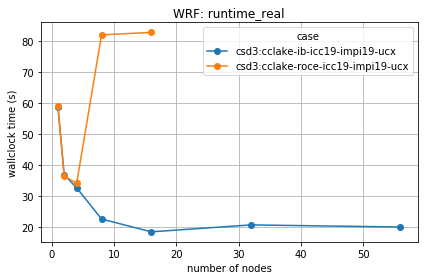

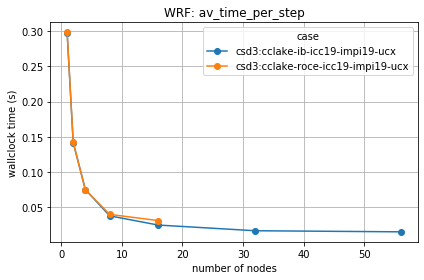

In [4]:
for var in ['runtime_real', 'av_time_per_step']:
    df = modules.utils.tabulate_last_perf('WRF*', 'num_nodes', var)
    title = 'WRF: %s' % var
    display_markdown('### %s' % title, raw=True)
    display(df)
    ax = df.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('wallclock time (s)')
    ax.set_title(title)
    plt.tight_layout()